## Air Quality Forecaster

This project is intended to predict the amount of particulants in the air (CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides and Nitrogen Dioxide). 
In this project, I imported and cleaned the dataset so that it could be used in a Prophet model to predict the amounts of particulants in the air and exported that data into a new dataset.  I then used that new dataset of predicted particulant concentrations to graph the change over time and programmed a function to calculate the hourly AQI.  I then did some analysis on the graphs and findings once all the data was gathered.

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aq_df = pd.read_excel(r"C:\Users\mcgun\OneDrive\Documents\AirQualityCleaned.xlsx")

In [5]:
# Cleans the 'Date' and 'Time' columns
aq_df['Date'] = pd.to_datetime(aq_df['Date'])
aq_df['Date'] = aq_df['Date'].dt.date
aq_df['Time'] = pd.to_datetime(aq_df['Time'])
aq_df['Time'] = aq_df['Time'].dt.time

# Creates a combined 'Date_Time' column
aq_df['Date'] = pd.to_datetime(aq_df['Date'])
aq_df['Date'] = aq_df['Date'].dt.strftime('%Y-%m-%d')
aq_df['Time'] = aq_df['Time'].apply(lambda x: x.strftime('%H:%M:%S'))
aq_df['Date_Time'] = aq_df['Date'] + ' ' + aq_df['Time']
aq_df['Date_Time'] = pd.to_datetime(aq_df['Date_Time'])

aq_df.head()[['Date', 'Time', 'Date_Time']]

,Date,Time,Date_Time
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


14:54:34 - cmdstanpy - INFO - Chain [1] start processing
14:54:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


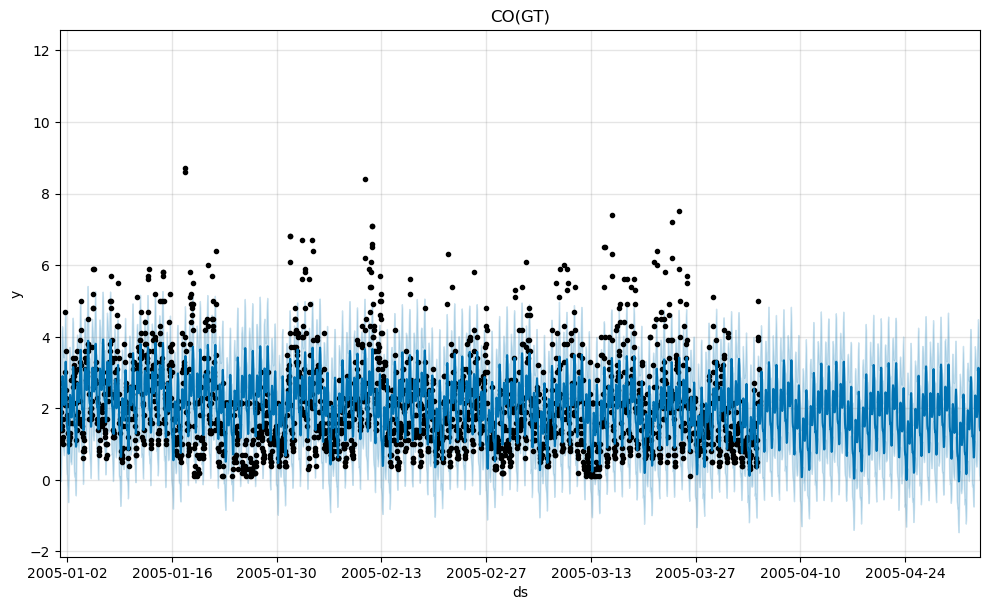

14:54:39 - cmdstanpy - INFO - Chain [1] start processing
14:54:40 - cmdstanpy - INFO - Chain [1] done processing
14:54:42 - cmdstanpy - INFO - Chain [1] start processing
14:54:43 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


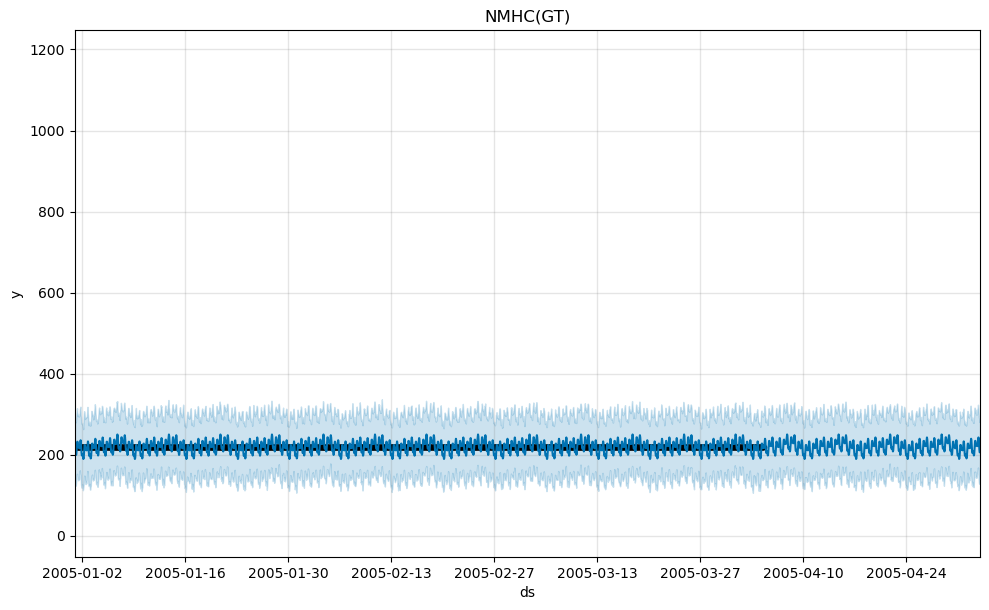

14:54:45 - cmdstanpy - INFO - Chain [1] start processing
14:54:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


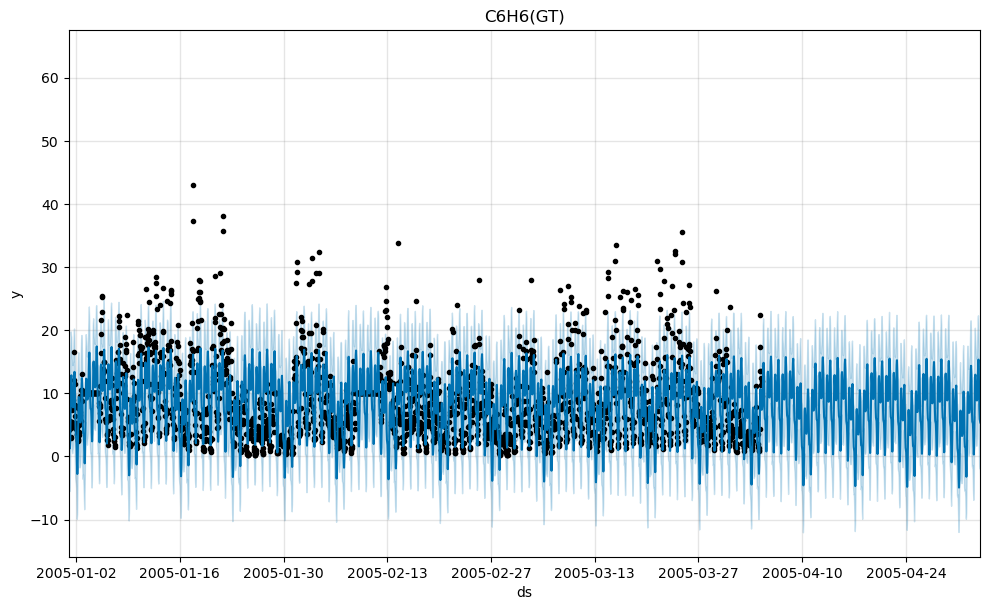

14:54:49 - cmdstanpy - INFO - Chain [1] start processing
14:54:51 - cmdstanpy - INFO - Chain [1] done processing
14:54:53 - cmdstanpy - INFO - Chain [1] start processing
14:54:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


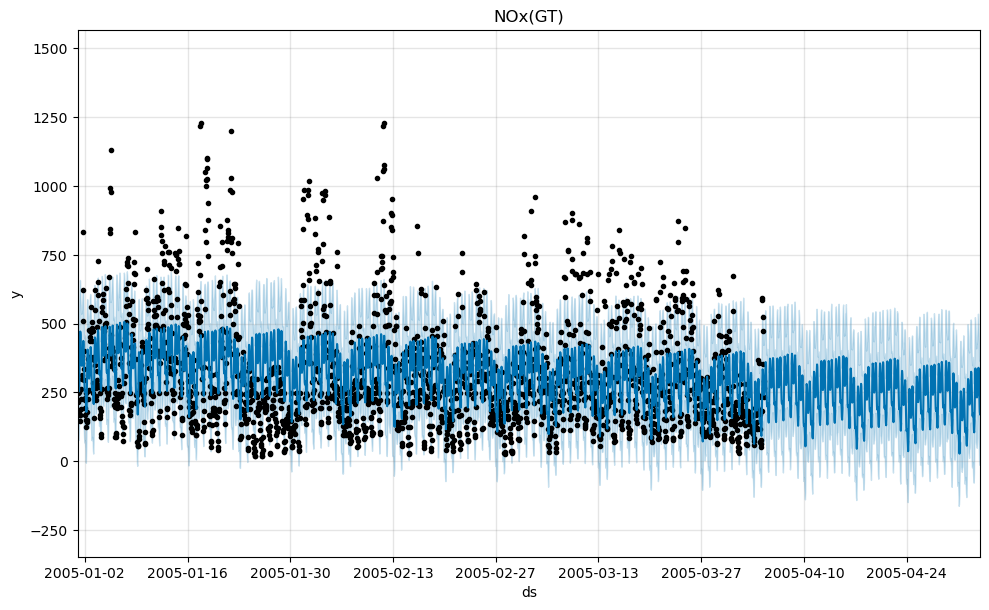

14:54:56 - cmdstanpy - INFO - Chain [1] start processing
14:54:58 - cmdstanpy - INFO - Chain [1] done processing
14:54:59 - cmdstanpy - INFO - Chain [1] start processing
14:55:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mcgun\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


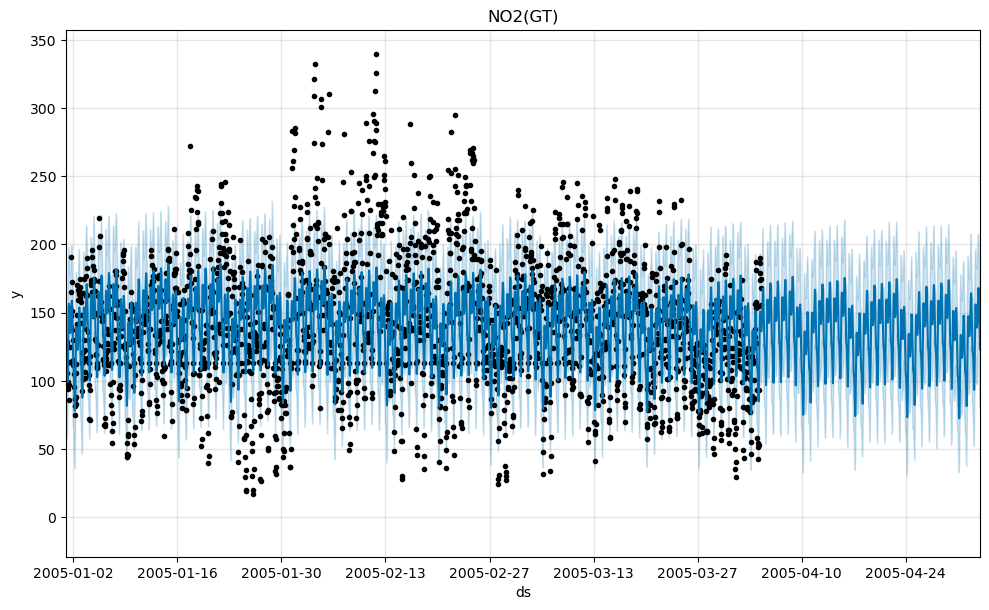

14:55:03 - cmdstanpy - INFO - Chain [1] start processing
14:55:05 - cmdstanpy - INFO - Chain [1] done processing
14:55:07 - cmdstanpy - INFO - Chain [1] start processing
14:55:08 - cmdstanpy - INFO - Chain [1] done processing
14:55:09 - cmdstanpy - INFO - Chain [1] start processing
14:55:12 - cmdstanpy - INFO - Chain [1] done processing
14:55:13 - cmdstanpy - INFO - Chain [1] start processing
14:55:14 - cmdstanpy - INFO - Chain [1] done processing
14:55:16 - cmdstanpy - INFO - Chain [1] start processing
14:55:18 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Runs through each particulant to predict the concentrations for the next month
predicted_forecast = pd.DataFrame()
for pollutant in list(aq_df.columns)[2:-1]:
    data = pd.DataFrame()
    data['ds'] = pd.to_datetime(aq_df['Date_Time'])
    data['y'] = aq_df[pollutant]
    model = Prophet()
    model.fit(data)
    forecast = model.make_future_dataframe(periods = 720, freq = 'H')
    predicted = model.predict(forecast)
    if 'GT' in pollutant:
        fig = model.plot(predicted)
        axes = fig.get_axes()
        for ax in axes:
            ax.set_xlim([pd.to_datetime('2005-01-01'), pd.to_datetime('2005-05-04')])
            plt.title(pollutant)
            plt.show()
    if 'ds' not in list(predicted_forecast.columns):
        predicted_forecast['ds'] = predicted[['ds']]
    predicted_forecast[pollutant] = predicted[['yhat']]

In [7]:
# Change CO & NO2 concentrations to ppm
predicted_forecast['CO(GT)_ppm'] = 24.45 * predicted_forecast['CO(GT)'] / 28.01
predicted_forecast['NO2(GT)_ppm'] = (24.45 * predicted_forecast['NO2(GT)']) / (46.01 * 1000)
predicted_forecast[['CO(GT)', 'CO(GT)_ppm','NO2(GT)', 'NO2(GT)_ppm']].head()

,CO(GT),CO(GT)_ppm,NO2(GT),NO2(GT)_ppm
0,3.564251,3.111244,136.851098,0.072724
1,3.774908,3.295127,141.607203,0.075251
2,3.592841,3.136200,138.532948,0.073617
3,3.076580,2.685555,127.390439,0.067696
4,2.493622,2.176689,112.938424,0.060016


In [8]:
# Creates a function to calculate AQI depending on which particulant
def calculate_aqi(pollutant, measure):        
    conc_breakpoints = {
        'CO': [(0.0, 50.0, 0.0, 4.4), 
                (51.0, 100.0, 4.5, 9.4), 
                (101.0, 150.0, 9.5, 12.4),
                (151.0, 200.0, 12.5, 15.4),
                (201.0, 300.0, 15.5, 30.4),
                (301.0, 500.0, 30.5, 50.4)],
        'NO2': [(0.0, 50.0, 0.0, 0.053),
                (51.0, 100.0, 0.054, 0.1),
                (101.0, 150.0, 0.101, 0.360),
                (151.0, 200.0, 0.361, 0.649),
                (201.0, 300.0, 0.65, 1.249),
                (301.0, 500.0, 1.25, 2.049)]
    }

    pollutant = pollutant.upper()

    if pollutant in list(conc_breakpoints.keys()):
        for (I_low, I_high, C_low, C_high)  in conc_breakpoints[pollutant]:
            C_low, C_high, measure = round(C_low, 6), round(C_high, 6), round(measure, 6)
            if C_low <= measure <= C_high:
                AQI = ((I_high - I_low) / (C_high - C_low)) * (measure - C_low) + I_low
                return round(AQI, 2)
    else:
        return 'Error: Inappropriate pollutant (must be either CO or NO2) or concentration out of range'

In [9]:
# Calculates hourly AQI for all entries
predicted_AQI = pd.DataFrame()
predicted_AQI['ds'] = predicted_forecast['ds'].copy()
predicted_AQI['AQI'] = predicted_forecast['NO2(GT)_ppm'].apply(lambda x: calculate_aqi('NO2', x))
predicted_AQI.head()

,ds,AQI
0,2004-03-10 18:00:00,70.95
1,2004-03-10 19:00:00,73.64
2,2004-03-10 20:00:00,71.90
3,2004-03-10 21:00:00,65.59
4,2004-03-10 22:00:00,57.41


In [10]:
# Join the particulant concentrations with the calculated AQI dataset
forecast_AQI = predicted_forecast.merge(predicted_AQI, how = 'inner', on = 'ds')
forecast_AQI.head()

,ds,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO(GT)_ppm,NO2(GT)_ppm,AQI
0,2004-03-10 18:00:00,3.564251,1439.332519,181.983476,17.138010,1195.442716,262.005578,871.264557,136.851098,1812.601254,1299.856194,16.947277,44.459042,0.776752,3.111244,0.072724,70.95
1,2004-03-10 19:00:00,3.774908,1460.306679,186.864453,17.940172,1223.343086,282.956777,844.974644,141.607203,1848.628263,1365.193066,15.550289,47.892087,0.793080,3.295127,0.075251,73.64
2,2004-03-10 20:00:00,3.592841,1429.713177,182.789973,16.434098,1175.591221,271.587988,868.259678,138.532948,1807.649395,1346.464757,14.294988,51.063866,0.805711,3.136200,0.073617,71.90
3,2004-03-10 21:00:00,3.076580,1363.283294,170.976203,13.269760,1073.691586,225.558030,926.158330,127.390439,1709.176501,1260.286397,13.439460,53.415463,0.813075,2.685555,0.067696,65.59
4,2004-03-10 22:00:00,2.493622,1298.930571,158.369613,10.204724,974.703374,166.375517,980.927580,112.938424,1611.944801,1162.704414,12.926249,55.067779,0.816406,2.176689,0.060016,57.41


Text(0, 0.5, 'AQI')

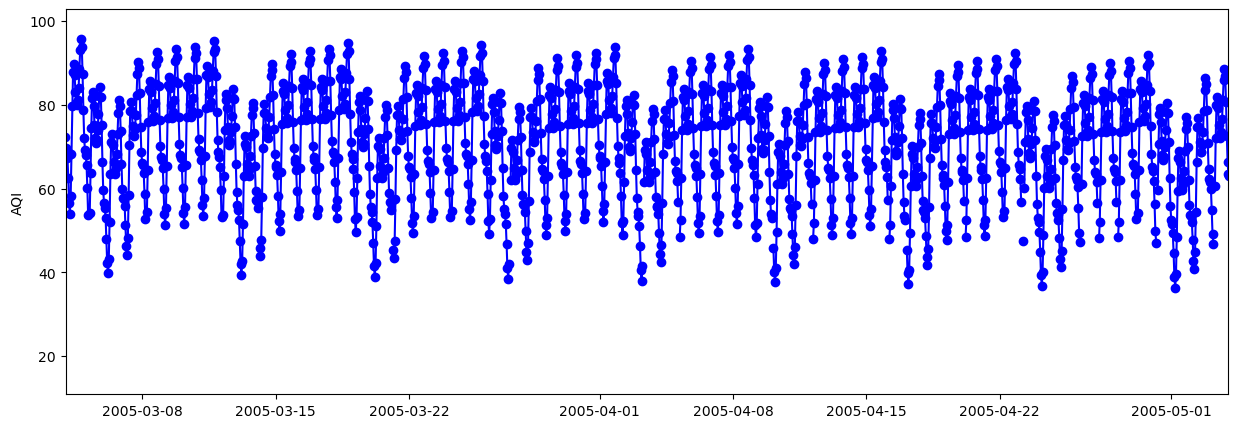

In [27]:
# Graphs the AQI from 2005-03-04 to 2004-05-04
plt.figure(figsize = (15, 5))
plt.plot(pd.to_datetime(forecast_AQI['ds']), forecast_AQI['AQI'], marker = 'o', linestyle = '-', color = 'b')
plt.xlim([pd.to_datetime('2005-03-04'), pd.to_datetime('2005-05-04')])
plt.ylabel('AQI')

(12481.0, 12542.0)

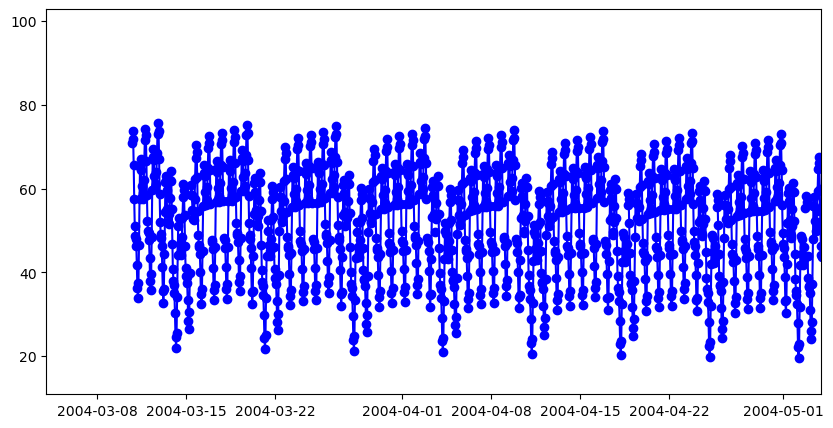

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(pd.to_datetime(forecast_AQI['ds']), forecast_AQI['AQI'], marker = 'o', linestyle = '-', color = 'b')
plt.xlim([pd.to_datetime('2004-03-04'), pd.to_datetime('2004-05-04')])

In [13]:
# Creates a new dataframe that consists of daily AQI averages
avg_aqi = pd.DataFrame()
avg_aqi = predicted_AQI[['ds', 'AQI']].copy()
avg_aqi['ds'] = pd.to_datetime(avg_aqi['ds']).dt.date
new = avg_aqi.groupby('ds')['AQI'].mean().reset_index()
print(new)

             ds        AQI
0    2004-03-10  65.093333
1    2004-03-11  56.346250
2    2004-03-12  58.045000
3    2004-03-13  51.008696
4    2004-03-14  43.340000
..          ...        ...
416  2005-04-30  67.470435
417  2005-05-01  58.968333
418  2005-05-02  65.955833
419  2005-05-03  71.303043
420  2005-05-04  67.380714

[421 rows x 2 columns]


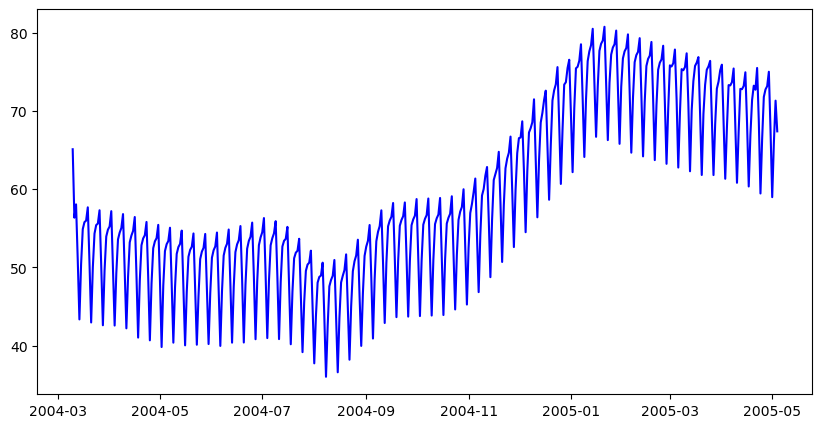

In [14]:
# Figure of the daily average AQI from 2004-03-10 until 2005-05-04
plt.figure(figsize = (10, 5))
plt.plot(pd.to_datetime(new['ds']), new['AQI'], linestyle = '-', color = 'b')

Since the beginning of 2005, the AQI of the city increased tremedously.  This is all due to the collection of smog that appeared at the Alps (https://earthobservatory.nasa.gov/images/15900/smog-in-northern-italy).